### Bibliotecas

In [1]:
import os
from welly import Well
import lasio
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Lendo Dados

In [2]:
df = pd.read_csv('./Data/volve_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27845 entries, 0 to 27844
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wellName  27845 non-null  object 
 1   MD        27845 non-null  float64
 2   BS        27845 non-null  float64
 3   CALI      27845 non-null  float64
 4   DT        5493 non-null   float64
 5   DTS       5420 non-null   float64
 6   GR        27845 non-null  float64
 7   NPHI      27845 non-null  float64
 8   RACEHM    27845 non-null  float64
 9   RACELM    27845 non-null  float64
 10  RHOB      27845 non-null  float64
 11  RPCEHM    27845 non-null  float64
 12  RPCELM    27600 non-null  float64
 13  PHIF      27736 non-null  float64
 14  SW        27736 non-null  float64
 15  VSH       27844 non-null  float64
dtypes: float64(15), object(1)
memory usage: 3.4+ MB


In [4]:
gdf = df.groupby('wellName')
gdf.head(2)

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,8.5,8.6718,86.9092,181.2241,53.9384,0.3222,0.508400023,0.845700026,2.7514,0.6461,0.6467,0.0200,1.0,0.6807
1,15/9-F-1 A,3431.1,8.5,8.6250,86.4334,181.1311,57.2889,0.3239,0.469500005,0.814499974,2.7978,0.7543,0.6570,0.0200,1.0,0.7316
2101,15/9-F-1 B,3230.0,8.5,8.6637,86.3417,NaN,93.6767,0.2188,1.583900000,1.552700000,2.5621,1.5495,1.5705,0.0589,1.0,0.7095
2102,15/9-F-1 B,3230.1,8.5,8.6637,86.6821,NaN,92.0230,0.2187,1.571400000,1.553100000,2.5548,1.5336,1.5680,0.0634,1.0,0.6962
4032,15/9-F-1 C,3223.0,8.5,8.5243,NaN,NaN,105.8871,0.2888,1.723800000,1.757000000,2.5113,1.7327,1.6795,NaN,NaN,NaN
4033,15/9-F-1 C,3223.1,8.5,8.5243,NaN,NaN,100.3595,0.2908,1.715600000,1.751600000,2.4992,1.7433,1.6748,0.0969,1.0,0.8263
12463,15/9-F-11 A,3576.0,8.5,8.6720,89.0330,165.4610,92.8360,0.2370,1.572000000,1.655000000,2.5160,1.6160,1.5830,0.0870,1.0,0.7600
12464,15/9-F-11 A,3576.1,8.5,8.6720,89.0770,167.7100,93.6440,0.2360,1.546000000,1.646000000,2.5240,1.6390,1.5960,0.0820,1.0,0.7670
13924,15/9-F-11 B,3352.0,8.5,8.6010,NaN,NaN,105.7750,0.2670,2.204000000,2.301000000,2.5530,2.3090,2.1240,0.0640,1.0,0.8760
13925,15/9-F-11 B,3352.1,8.5,8.5780,NaN,NaN,106.4600,0.2590,2.149000000,2.259000000,2.5510,2.3900,2.1520,0.0660,1.0,0.8820


In [5]:
df.shape

(27845, 16)

In [6]:
df2 = df.dropna()
df2.shape

(5339, 16)

In [7]:
gdf2 = df2.groupby('wellName')
gdf2.head()

,wellName,MD,BS,CALI,DT,DTS,GR,NPHI,RACEHM,RACELM,RHOB,RPCEHM,RPCELM,PHIF,SW,VSH
0,15/9-F-1 A,3431.0,8.5,8.6718,86.9092,181.2241,53.9384,0.3222,0.508400023,0.845700026,2.7514,0.6461,0.6467,0.0200,1.0,0.6807
1,15/9-F-1 A,3431.1,8.5,8.6250,86.4334,181.1311,57.2889,0.3239,0.469500005,0.814499974,2.7978,0.7543,0.6570,0.0200,1.0,0.7316
2,15/9-F-1 A,3431.2,8.5,8.6250,85.9183,180.9487,59.0455,0.3277,0.501200020,0.804799974,2.8352,0.8718,0.6858,0.0200,1.0,0.7583
3,15/9-F-1 A,3431.3,8.5,8.6250,85.3834,180.7211,58.2550,0.3357,0.604799986,0.798399985,2.8557,0.9451,0.7913,0.0200,1.0,0.7462
4,15/9-F-1 A,3431.4,8.5,8.6250,84.8484,180.4930,59.4569,0.3456,0.711499989,0.778199971,2.8632,1.0384,0.8730,0.0200,1.0,0.7646
2174,15/9-F-1 B,3237.3,8.5,8.6976,86.1358,145.5811,75.6764,0.2373,1.118000000,1.174100000,2.5044,1.0691,1.1240,0.0939,1.0,0.5655
2175,15/9-F-1 B,3237.4,8.5,8.6976,86.0332,144.0806,73.7410,0.2337,1.097600000,1.165400000,2.5229,1.0621,1.1163,0.0826,1.0,0.5499
2176,15/9-F-1 B,3237.5,8.5,8.6976,85.7798,142.3907,73.6004,0.2334,1.094800000,1.173000000,2.5177,1.0218,1.0918,0.0856,1.0,0.5487
2177,15/9-F-1 B,3237.6,8.5,8.6976,85.4510,140.5426,75.1597,0.2345,1.084200000,1.175500000,2.4943,1.0170,1.0818,0.0997,1.0,0.5612
2178,15/9-F-1 B,3237.7,8.5,8.6973,85.1167,138.3278,75.8059,0.2340,1.083900000,1.167300000,2.4726,1.0154,1.0878,0.1128,1.0,0.5665


In [8]:
def plot_curves(wellname, dataframe, tracks, log_curves=['RACEHM', 'RACELM', 'RPCEHM', 'RPCELM']):
    n_tracks = len(tracks)
    fig, ax = plt.subplots(1, n_tracks, figsize=(n_tracks*2, 5), sharey=True)
    fig.suptitle(f'Well: {wellname}')
    for i, c in enumerate(tracks):
        ax[i].plot(dataframe[c], dataframe['MD'], 'r')
        ax[i].grid()
        ax[i].set_title(c)
        ax[i].invert_yaxis()
        if c in log_curves:
            ax[i].set_xscale('log')
    ax[0].set_ylabel('Depth[m]')

### Plotando

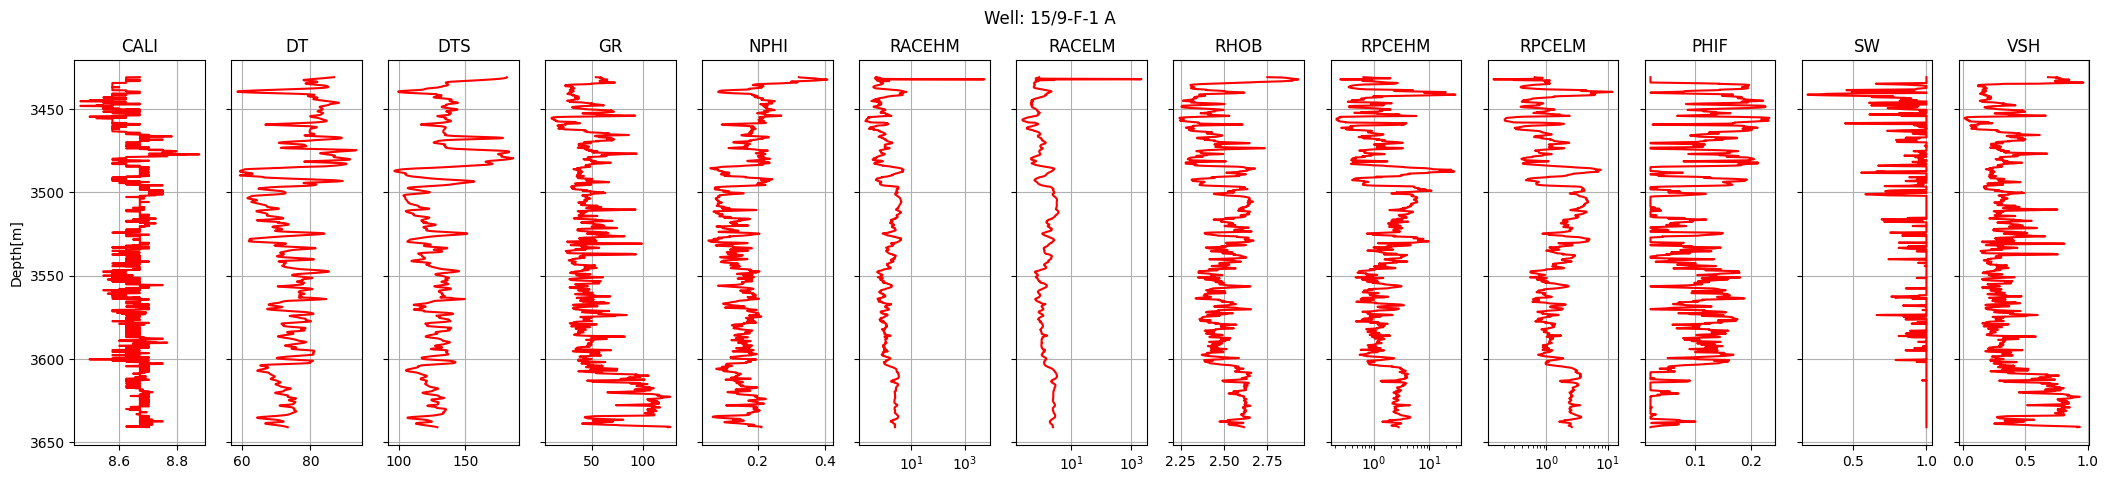

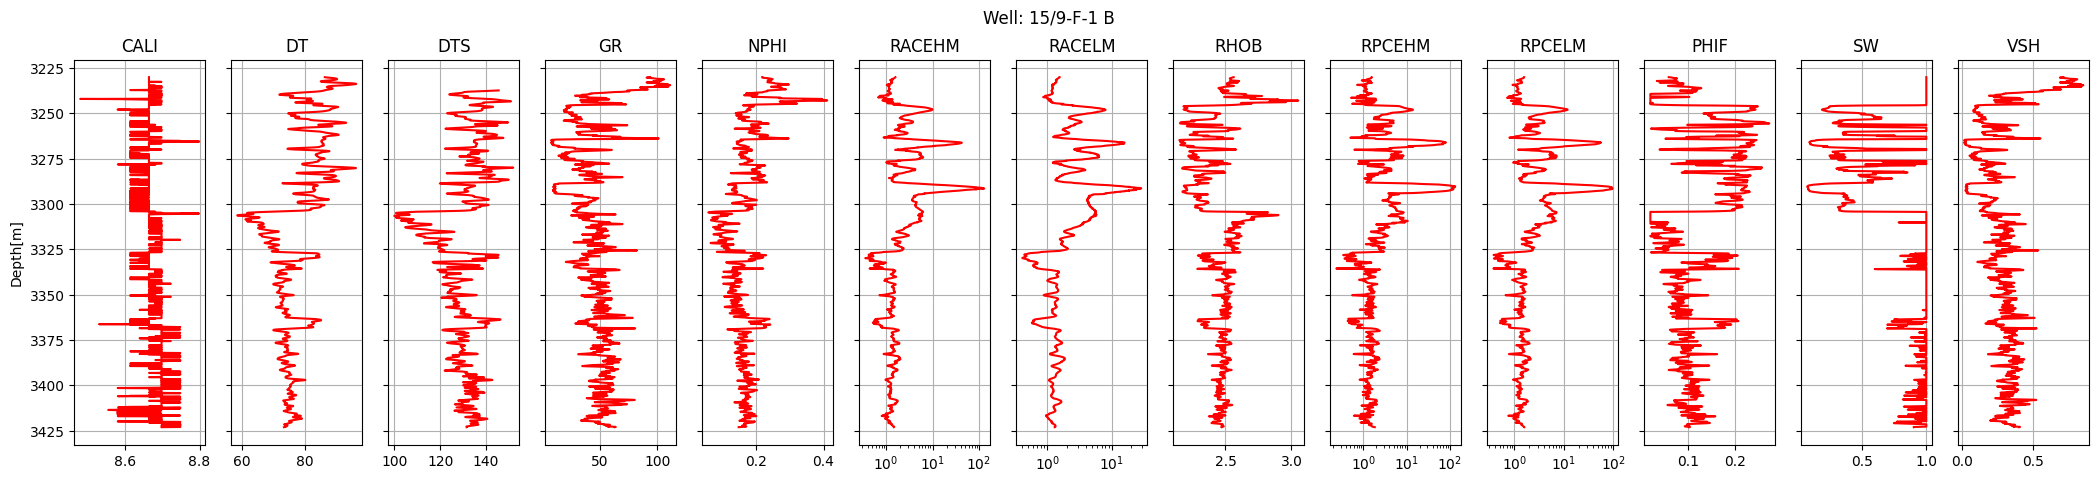

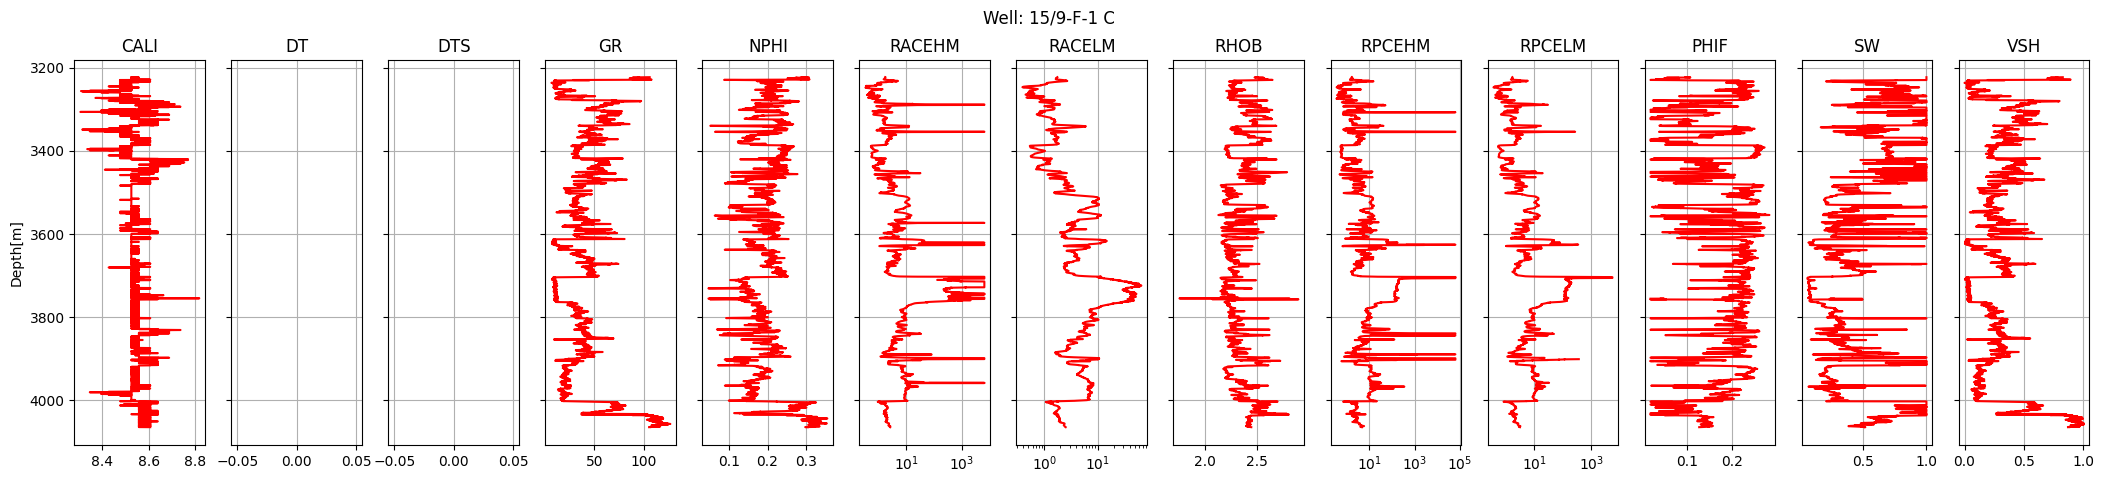

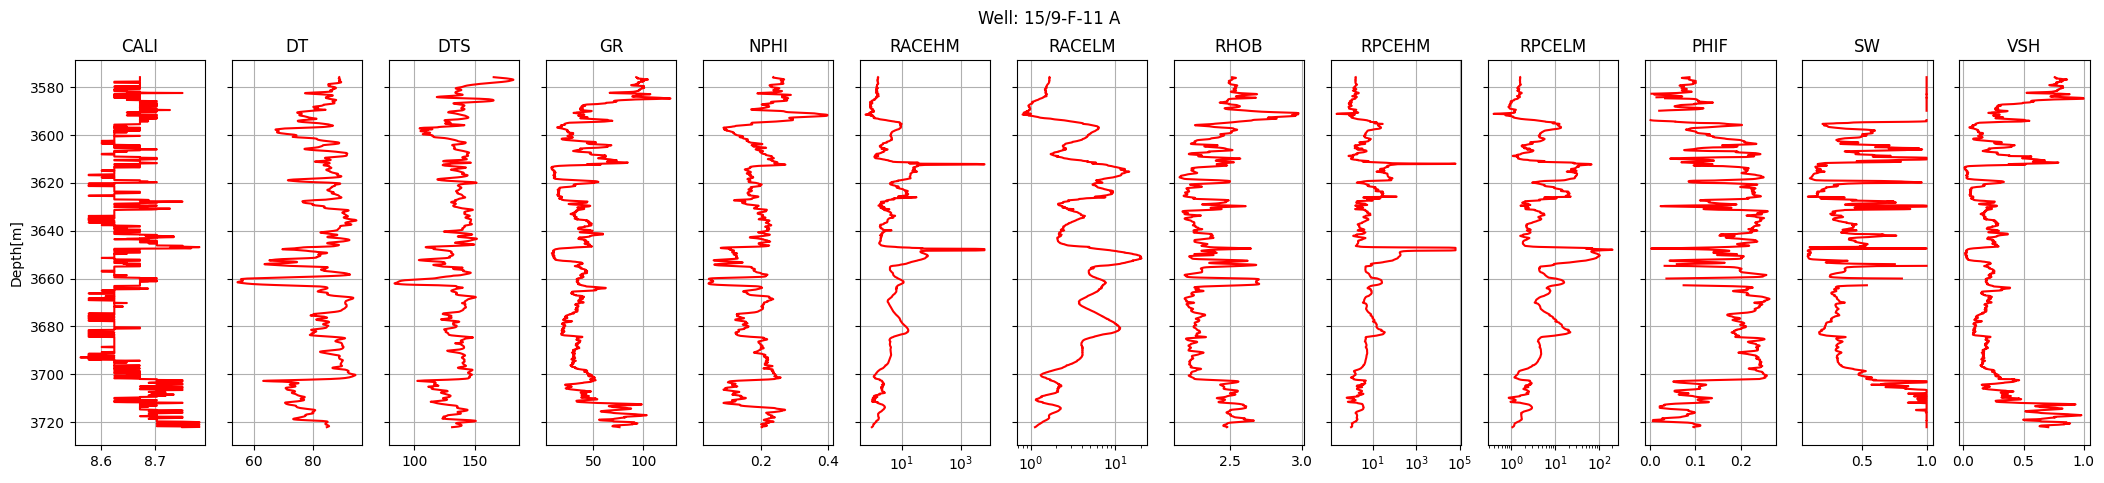

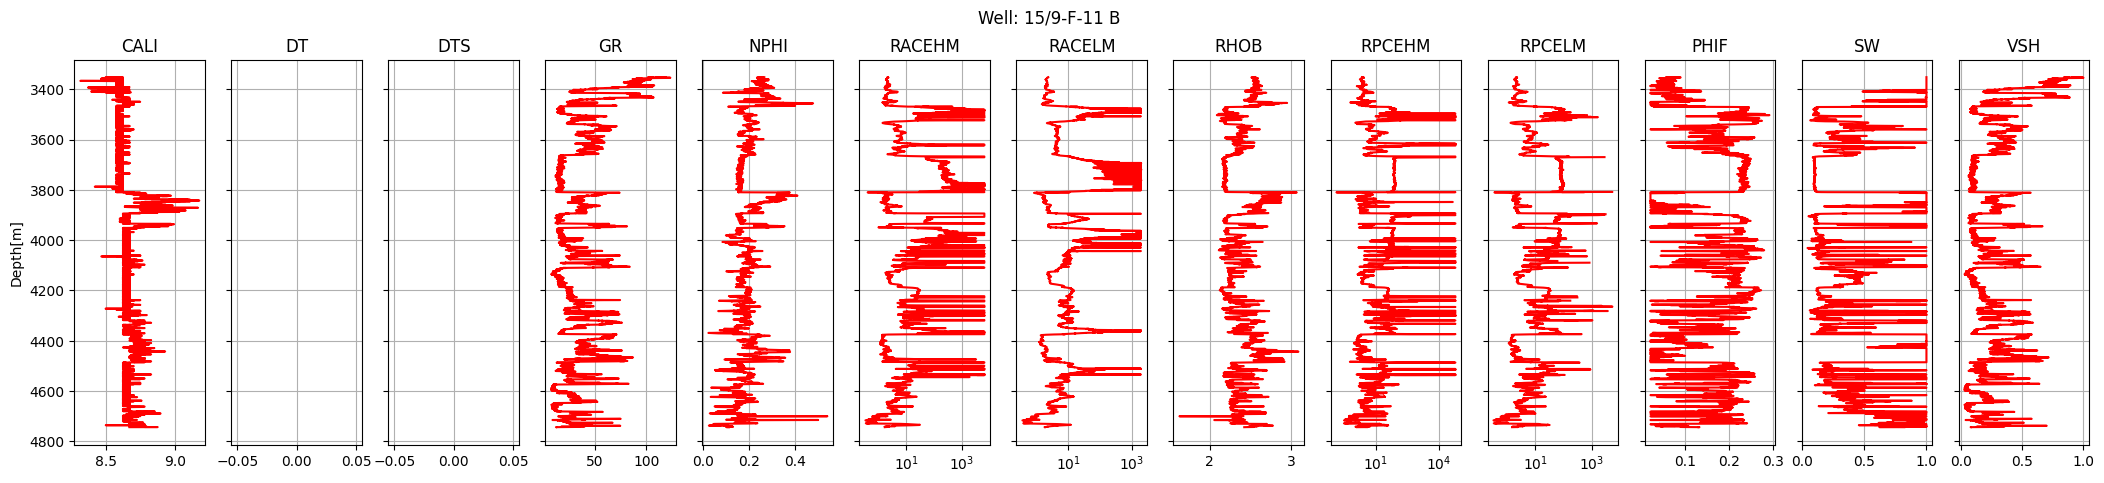

In [9]:
dfs = []
wellNames = []
for well, data in gdf:
    wellNames.append(well)
    dfs.append(data)

tracks = ['CALI','DT','DTS','GR','NPHI','RACEHM','RACELM','RHOB','RPCEHM','RPCELM','PHIF','SW','VSH']

for iw in range(len(wellNames)):
    plot_curves(wellNames[iw], dfs[iw], tracks)

<Axes: xlabel='DT', ylabel='Density'>

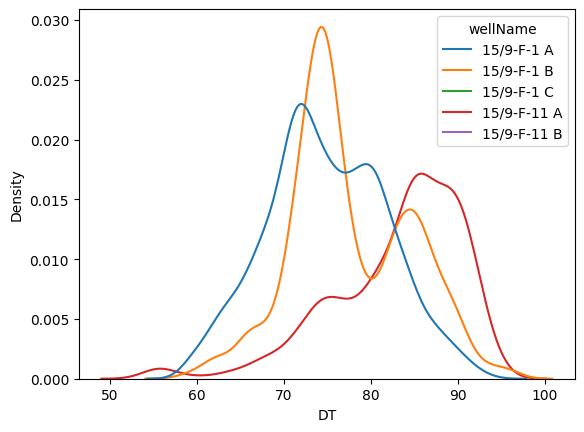

In [10]:
sns.kdeplot(df, x='DT', hue='wellName')

<Axes: xlabel='GR', ylabel='Density'>

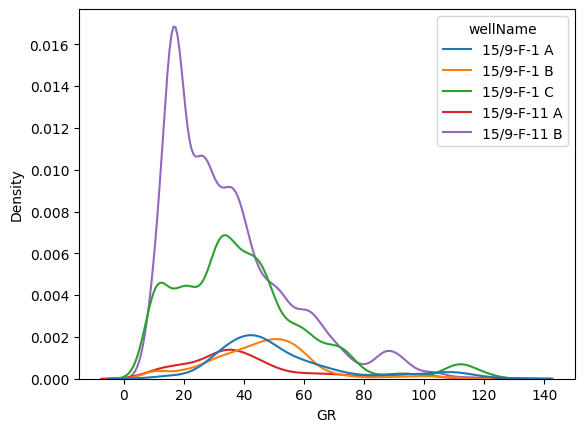

In [11]:
sns.kdeplot(df, x='GR', hue='wellName')

### Seleção de variáveis

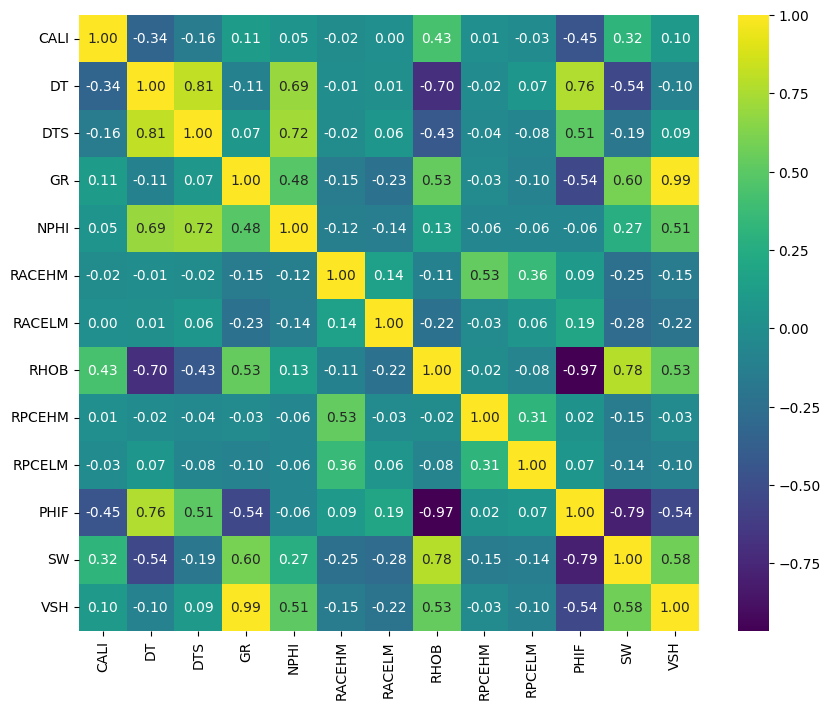

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.iloc[:,3:].corr(), annot=True, fmt=".2f", cmap='viridis');

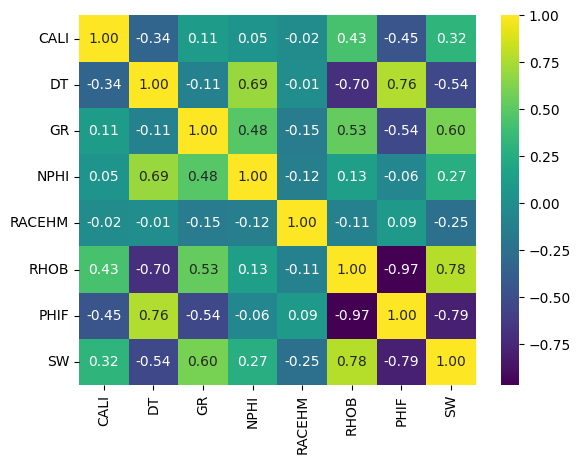

In [13]:
# caliper removido sem correlação, racelm/rpcelm tmb
# DTS alto correla com DT, vsh com gr
# phif/sw com rhob,
filtered_vars = ['wellName', 'MD','CALI','DT','GR','NPHI','RACEHM','RHOB','PHIF','SW']
sns.heatmap(df[filtered_vars[2:]].corr(), annot=True, fmt=".2f", cmap='viridis');

In [14]:
df_filt = df[filtered_vars]
df_filt.shape

(27845, 10)

### Removendo outliers transformando resistividades (log)

In [15]:
df_filt = df_filt.loc[~((df.RACEHM > 100) | (df.RPCEHM > 100)),:]
df_filt.columns

Index(['wellName', 'MD', 'CALI', 'DT', 'GR', 'NPHI', 'RACEHM', 'RHOB', 'PHIF',
       'SW'],
      dtype='object')

### Plotando Variaveis selecionadas

In [16]:
df_filt['RACEHM_LOG'] = np.log10(df_filt['RACEHM'])
# df_filt['RPCEHM_LOG'] = np.log10(df_filt['RPCEHM'])

In [17]:
df_filt.describe()

,MD,CALI,DT,GR,NPHI,RACEHM,RHOB,PHIF,SW,RACEHM_LOG
count,23733.0000000000,23733.0000000000,5404.0000000000,23733.0000000000,23733.0000000000,23733.0000000000,23733.0000000000,23651.0000000000,23651.0000000000,23733.0000000000
mean,3809.8694433911,8.6271487085,77.9566042931,41.4584397000,0.1931839422,7.5830542229,2.3982575317,0.1499105450,0.5986981269,0.5652819031
std,418.7923873670,0.0837192478,7.7652164251,21.8141220332,0.0548269265,12.3810005100,0.1614445714,0.0771985496,0.3366088967,0.4882939997
min,3223.0000000000,8.3049000000,54.2800000000,6.8691000000,0.0260000000,0.1974000000,1.6270000000,0.0010000000,0.0870000000,-0.7046528517
25%,3470.9000000000,8.5569000000,72.5064000000,26.1260000000,0.1615000000,1.7039000000,2.2591000000,0.0810000000,0.2790000000,0.2314441029
50%,3664.8000000000,8.6250000000,77.1042000000,37.7800000000,0.1912000000,2.9797000000,2.3838000000,0.1630000000,0.5490000000,0.4741725410
75%,4081.6000000000,8.6720000000,84.3958000000,51.8846000000,0.2200000000,7.7560010000,2.5200000000,0.2199000000,1.0000000000,0.8896378564
max,4744.0000000000,9.1750000000,96.2776000000,127.0557000000,0.5410000000,99.8700000000,3.0900000000,0.2820000000,1.0000000000,1.9994350499


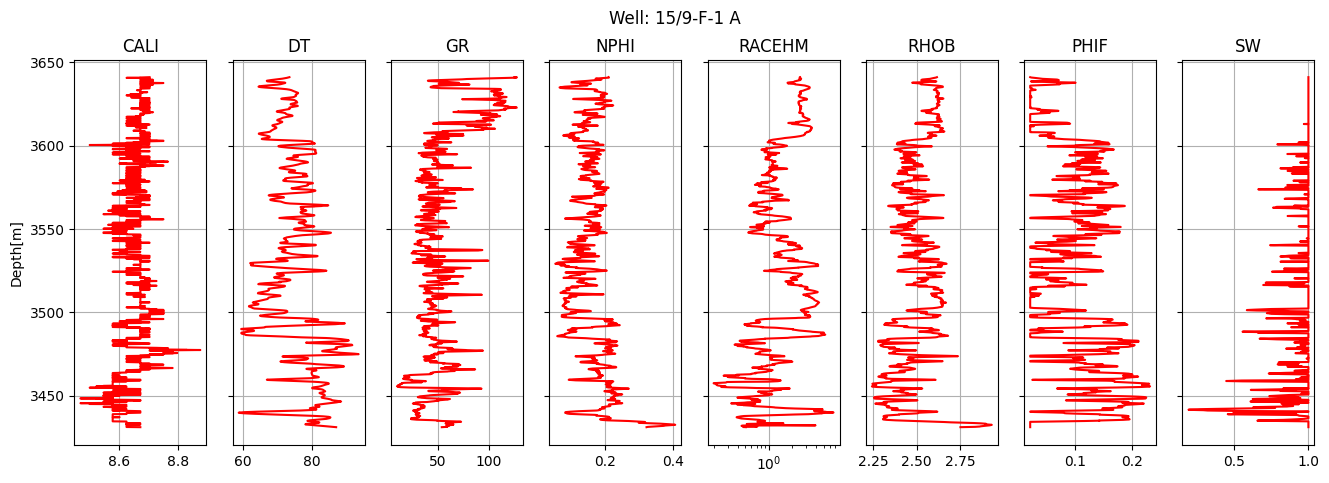

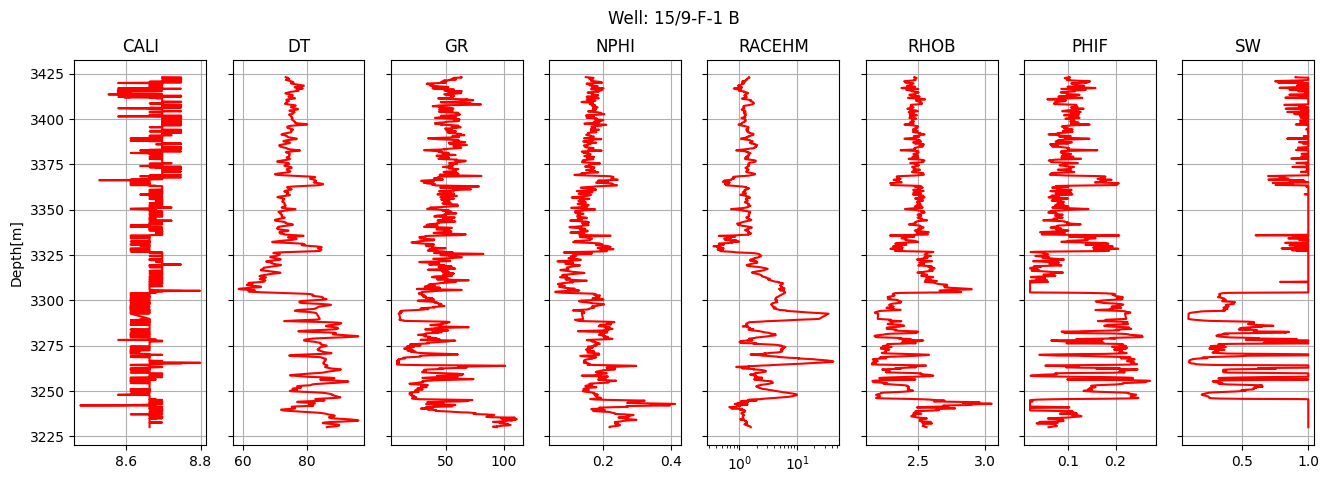

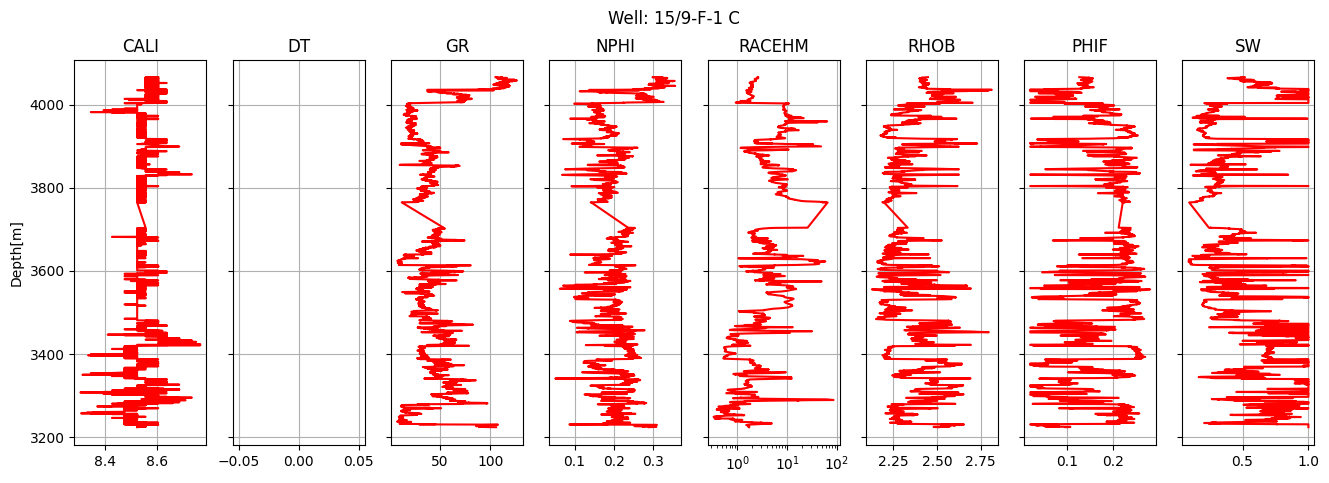

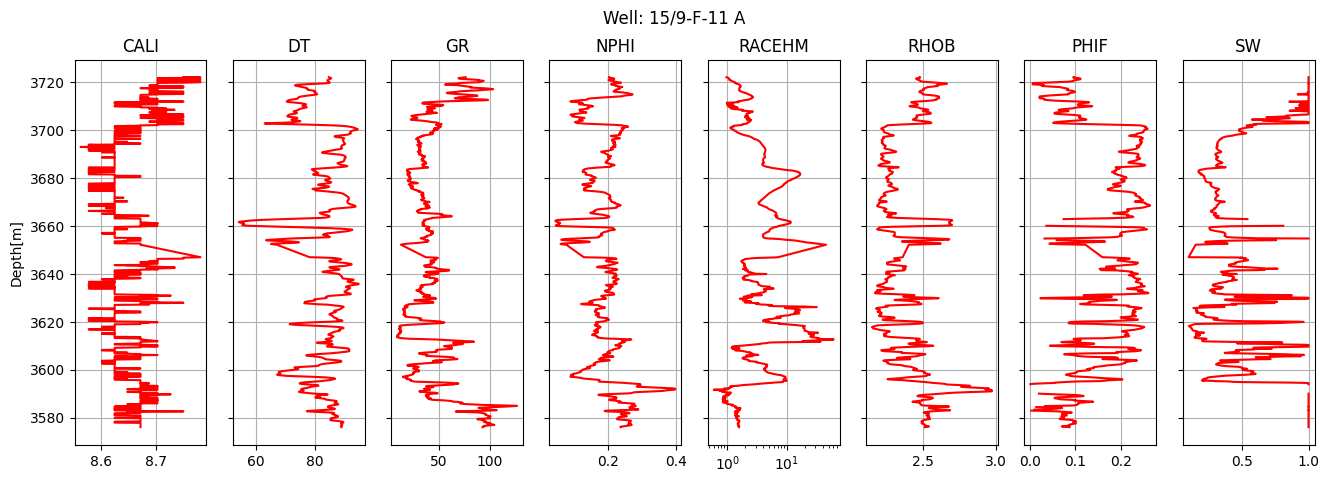

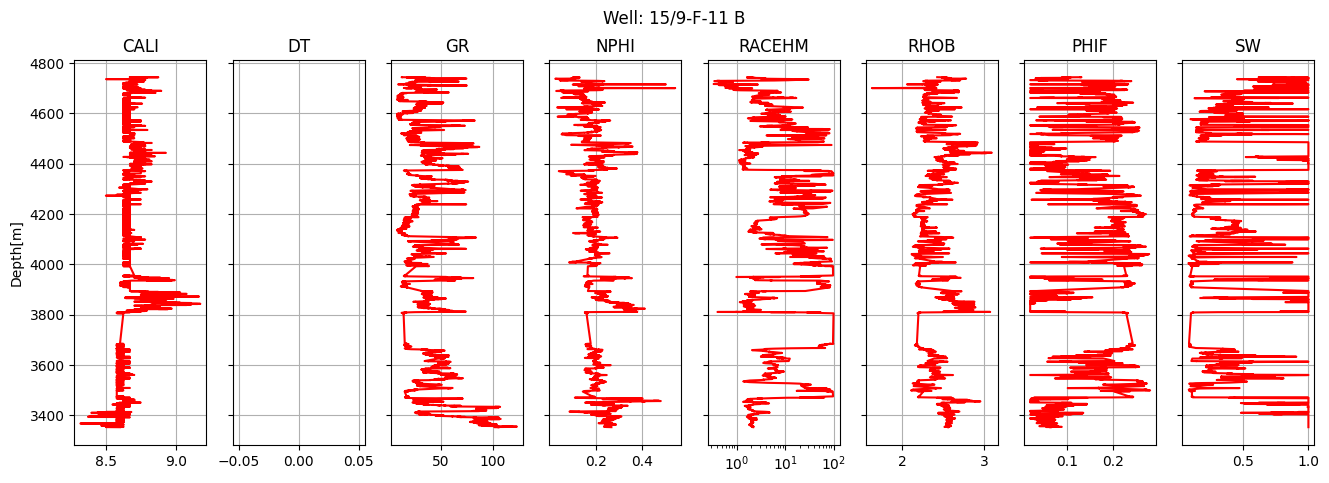

In [18]:
wellNames = []
dfs=[]
for well, data in df_filt.groupby('wellName'):
    wellNames.append(well)
    dfs.append(data)

for iw in range(len(wellNames)):
    plot_curves(wellNames[iw], dfs[iw], filtered_vars[2:])

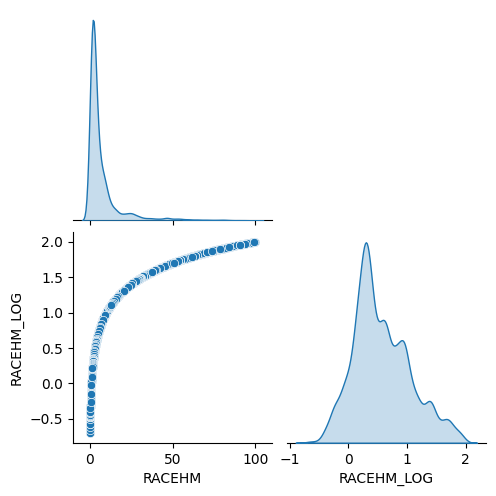

In [19]:
# res_vars = ['RACEHM','RACEHM_LOG','RPCEHM','RPCEHM_LOG']
res_vars = ['RACEHM','RACEHM_LOG']
sns.pairplot(data=df_filt[res_vars], diag_kind='kde', corner=True);

In [20]:
df_filt.columns

Index(['wellName', 'MD', 'CALI', 'DT', 'GR', 'NPHI', 'RACEHM', 'RHOB', 'PHIF',
       'SW', 'RACEHM_LOG'],
      dtype='object')

In [21]:
df_filt.drop(columns=['RACEHM'], inplace=True)

In [22]:
df_filt.columns

Index(['wellName', 'MD', 'CALI', 'DT', 'GR', 'NPHI', 'RHOB', 'PHIF', 'SW',
       'RACEHM_LOG'],
      dtype='object')

In [23]:
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23733 entries, 0 to 27844
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wellName    23733 non-null  object 
 1   MD          23733 non-null  float64
 2   CALI        23733 non-null  float64
 3   DT          5404 non-null   float64
 4   GR          23733 non-null  float64
 5   NPHI        23733 non-null  float64
 6   RHOB        23733 non-null  float64
 7   PHIF        23651 non-null  float64
 8   SW          23651 non-null  float64
 9   RACEHM_LOG  23733 non-null  float64
dtypes: float64(9), object(1)
memory usage: 2.0+ MB


In [24]:
df_filt.groupby('wellName').count()

,MD,CALI,DT,GR,NPHI,RHOB,PHIF,SW,RACEHM_LOG
wellName,,,,,,,,,
15/9-F-1 A,2099,2099,2099,2099,2099,2099,2099,2099,2099
15/9-F-1 B,1903,1903,1903,1903,1903,1903,1903,1903,1903
15/9-F-1 C,7631,7631,0,7631,7631,7631,7630,7630,7631
15/9-F-11 A,1402,1402,1402,1402,1402,1402,1321,1321,1402
15/9-F-11 B,10698,10698,0,10698,10698,10698,10698,10698,10698


In [25]:
df_filt.to_csv('./Data/volve_preproc.csv', index=False)